Histogramas

Ahora que sabemos cómo los gráficos de dispersión, los gráficos de líneas y los gráficos de barras nos ayudan a comprender y analizar las relaciones entre variables en nuestros datos, aprenderemos a trazar una distribución para una sola variable.

Es hora de que conozcas los histogramas.

Histogramas
Un histograma es un gráfico que muestra la frecuencia con la que aparecen diferentes valores para una variable en tu conjunto de datos. Aunque puede parecerse a los gráficos de barras, existen algunas diferencias clave entre los dos tipos:

Los gráficos de barras se utilizan para comparar valores de variables discretas; los histogramas se utilizan para trazar distribuciones de variables numéricas continuas.
El orden de las barras en los gráficos de barras puede modificarse para efectos de estilo o de comunicación. Sin embargo, el orden de las barras en los histogramas no puede cambiarse.
En un histograma, el eje X representa la variable y su rango de valores. El eje Y representa la frecuencia de ocurrencia para cada valor. Y es por ello que no tiene sentido cambiar el orden de las barras.

A continuación te mostramos un ejemplo:

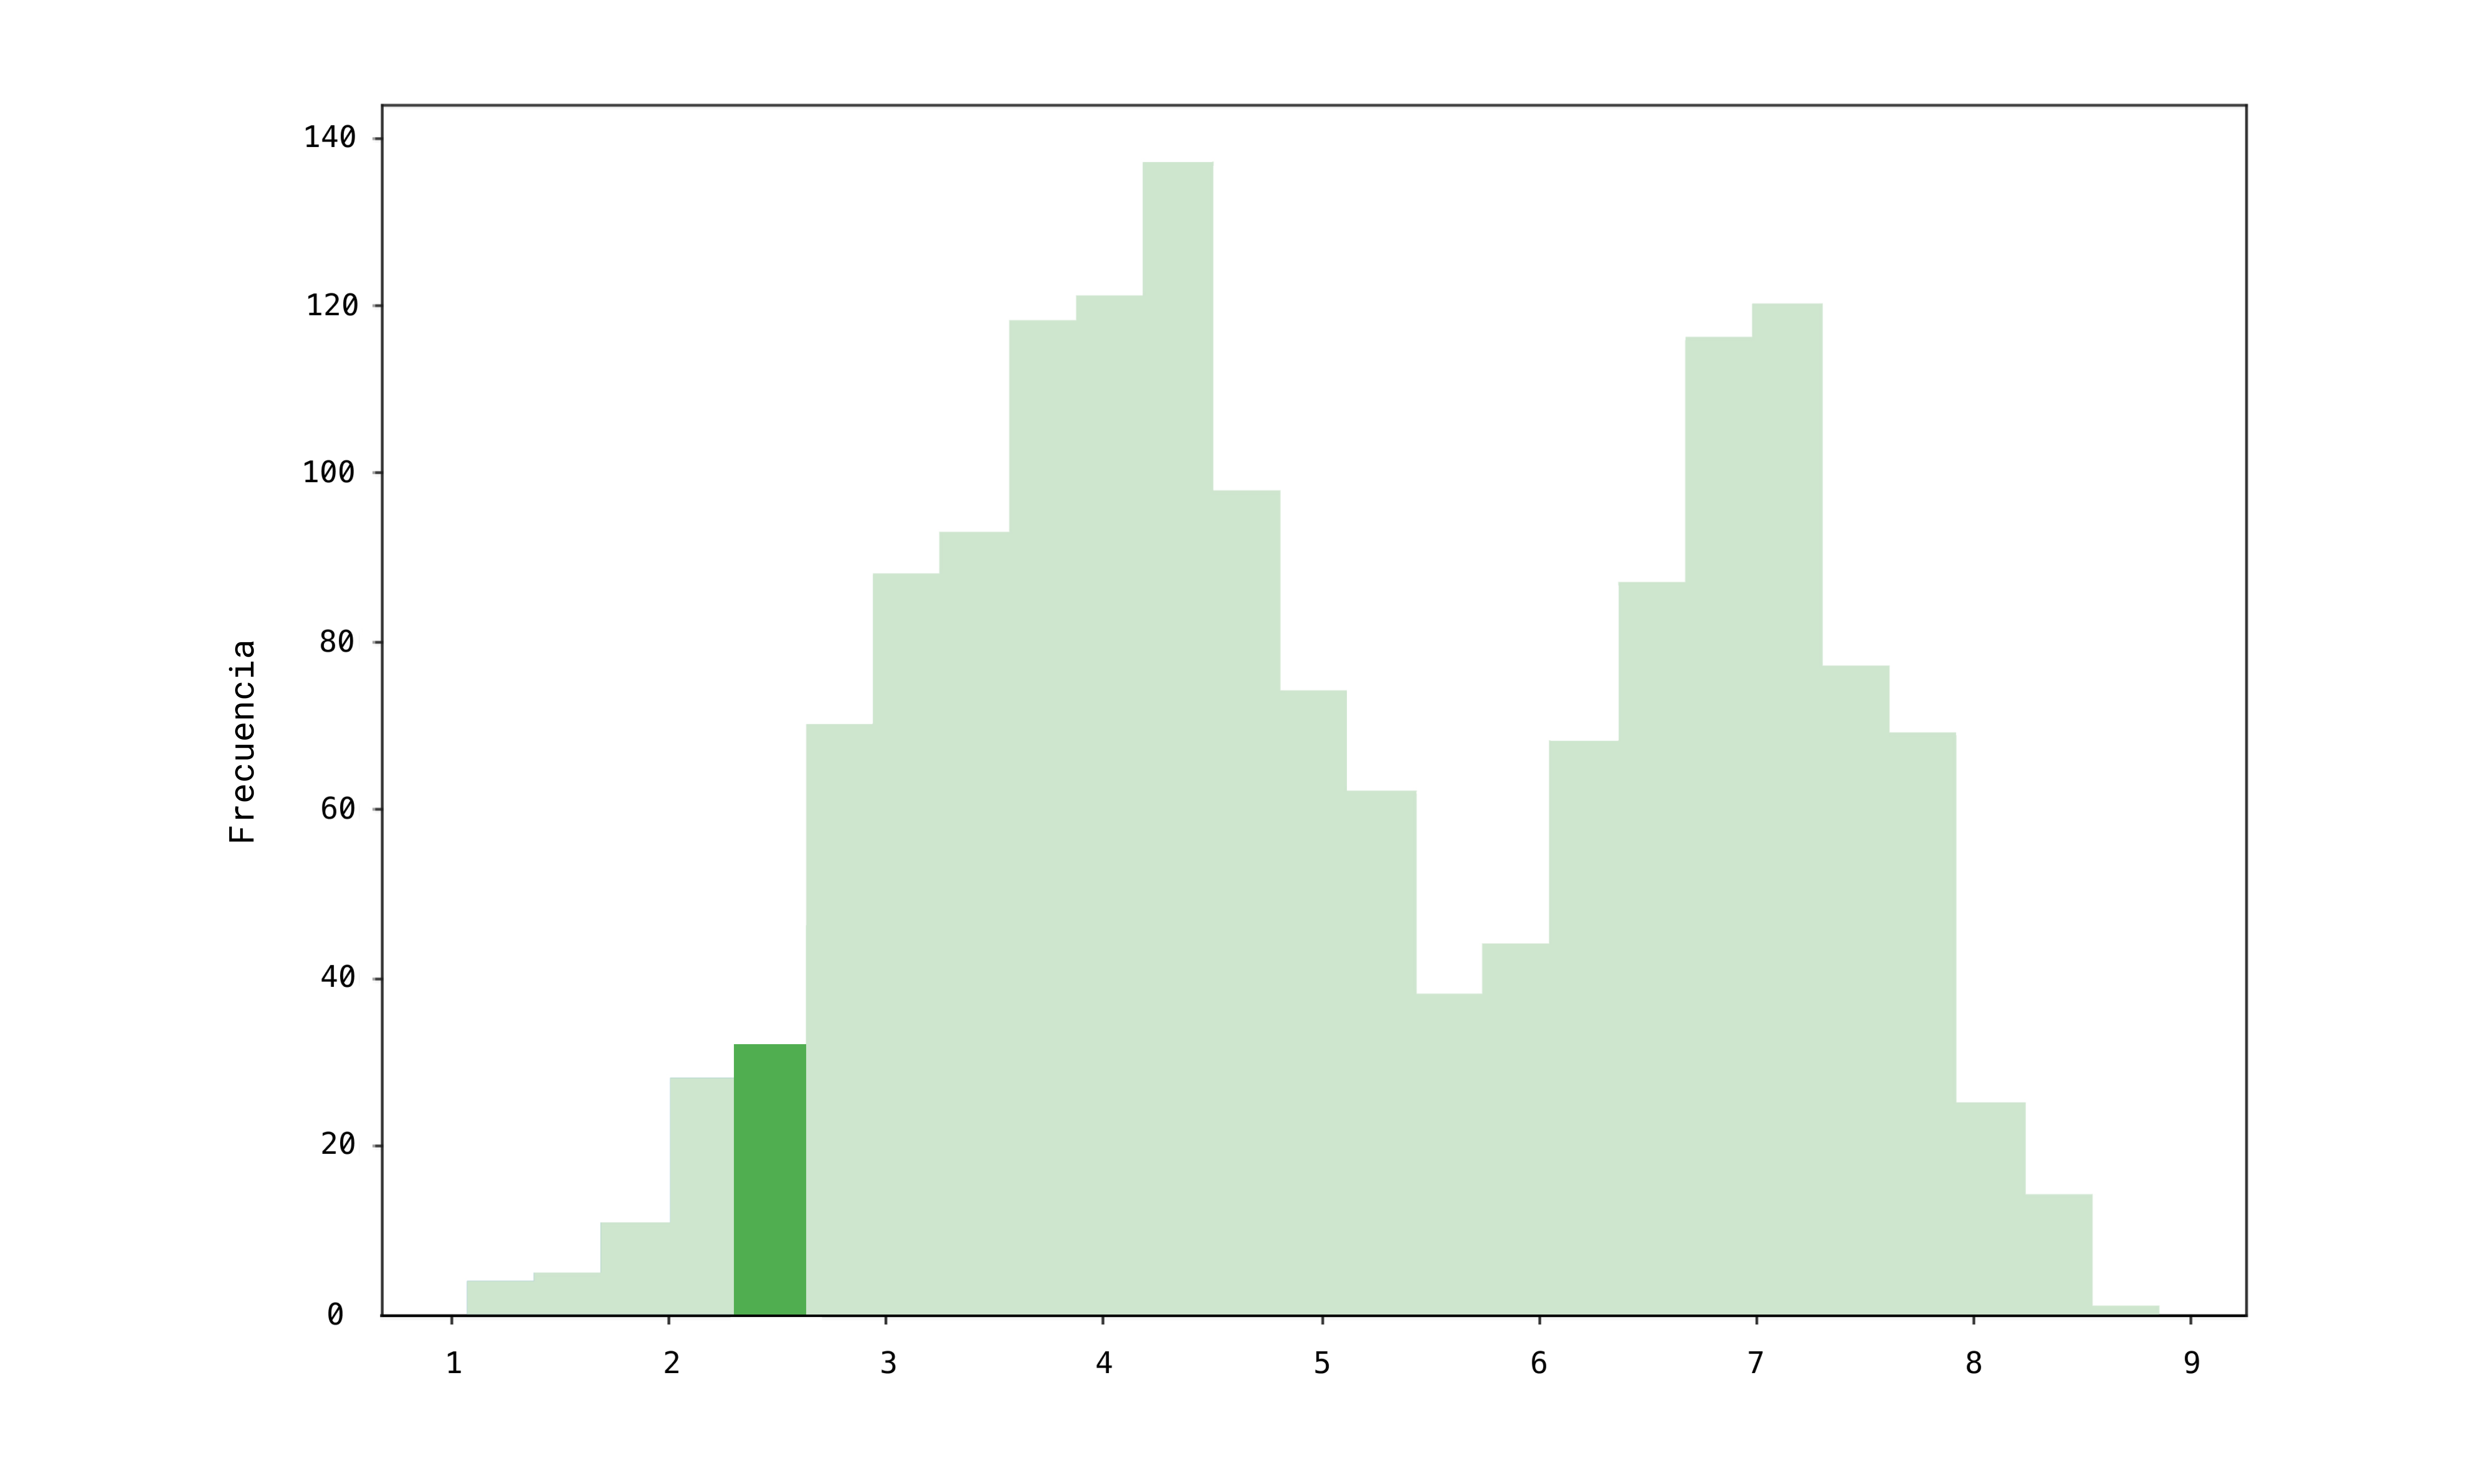

Este histograma representa una variable que toma valores en el rango de 1 a 9, siendo los valores alrededor de 4 y 7 los más frecuentes.

Debido a que la variable puede tomar cualquier valor en el rango, contar cada valor único y graficar las frecuencias no es útil. En su lugar, un histograma parte el rango de valores en secciones llamadas contenedores. En la gráfica anterior, uno de los contenedores está resaltado para ilustrar los tamaños de los contenedores.

Cada contenedor tiene el mismo ancho; la altura de un contenedor corresponde al número de observaciones que están dentro del rango de ese contenedor. Por lo tanto, la apariencia de un histograma depende del número de contenedores que decidamos que debe tener.

El histograma anterior tiene 25 contenedores. Veamos qué pasa si trazamos los mismos datos utilizando tan solo 10 contenedores.

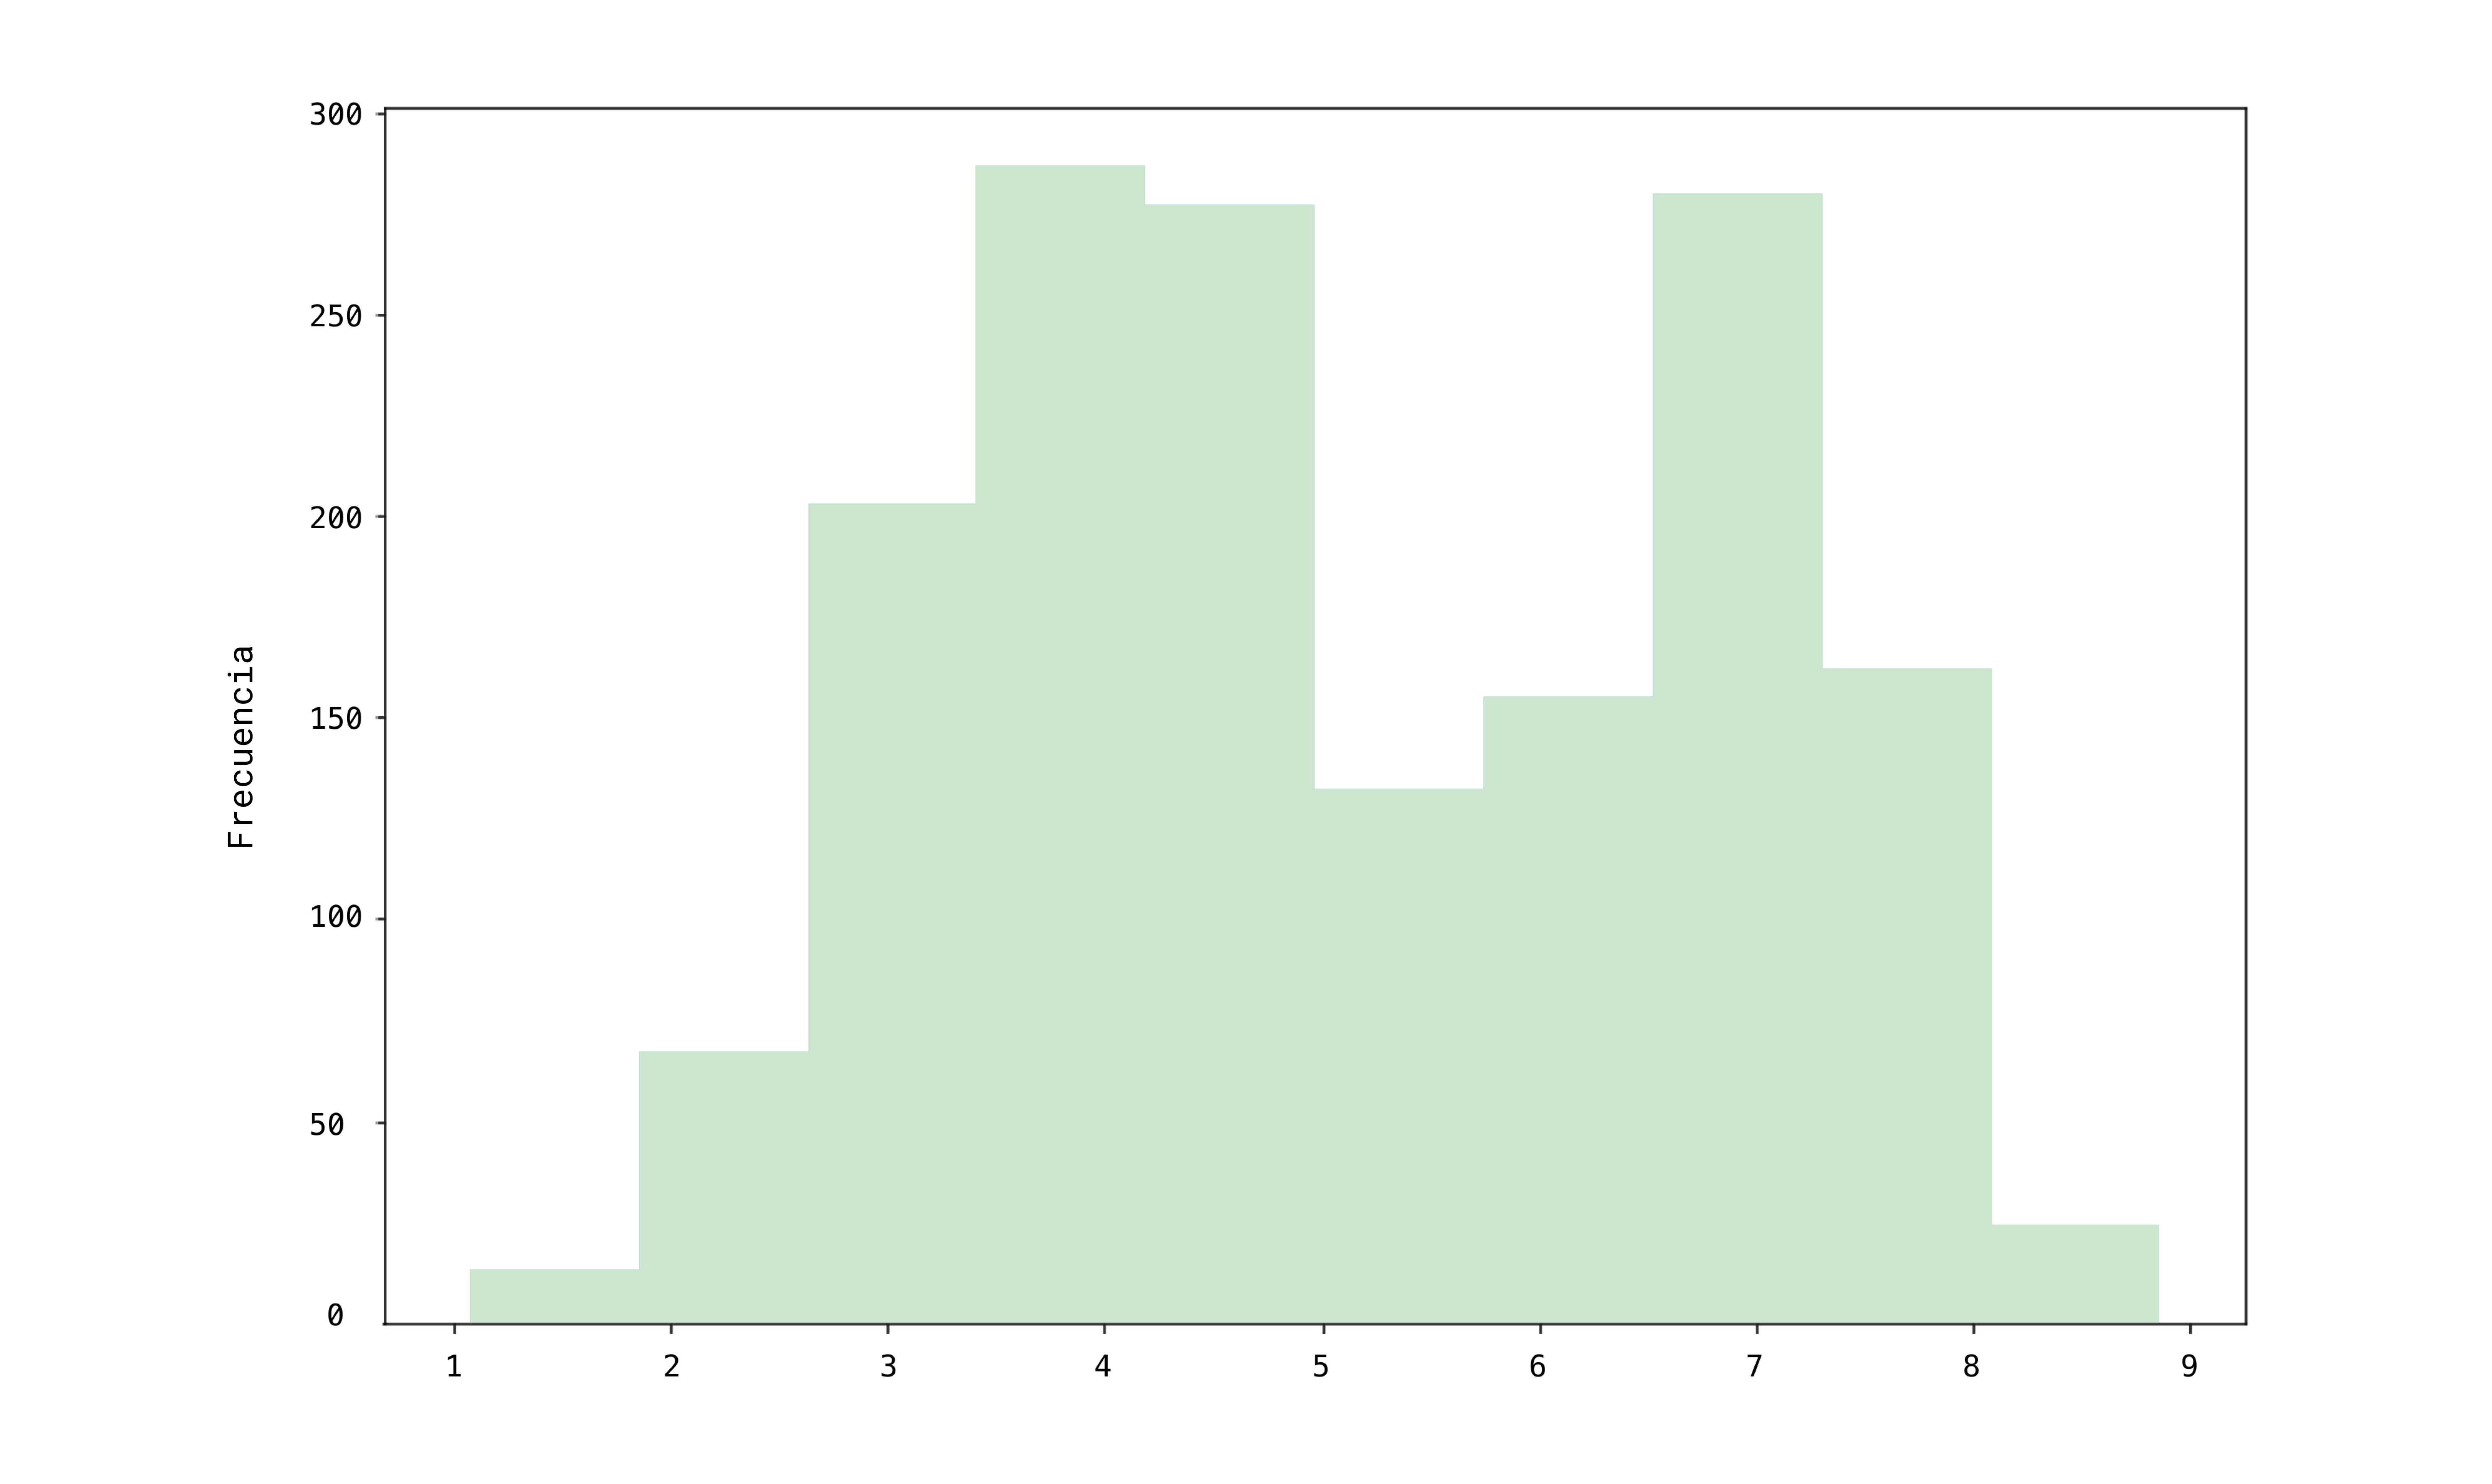

Y 100 contenedores:

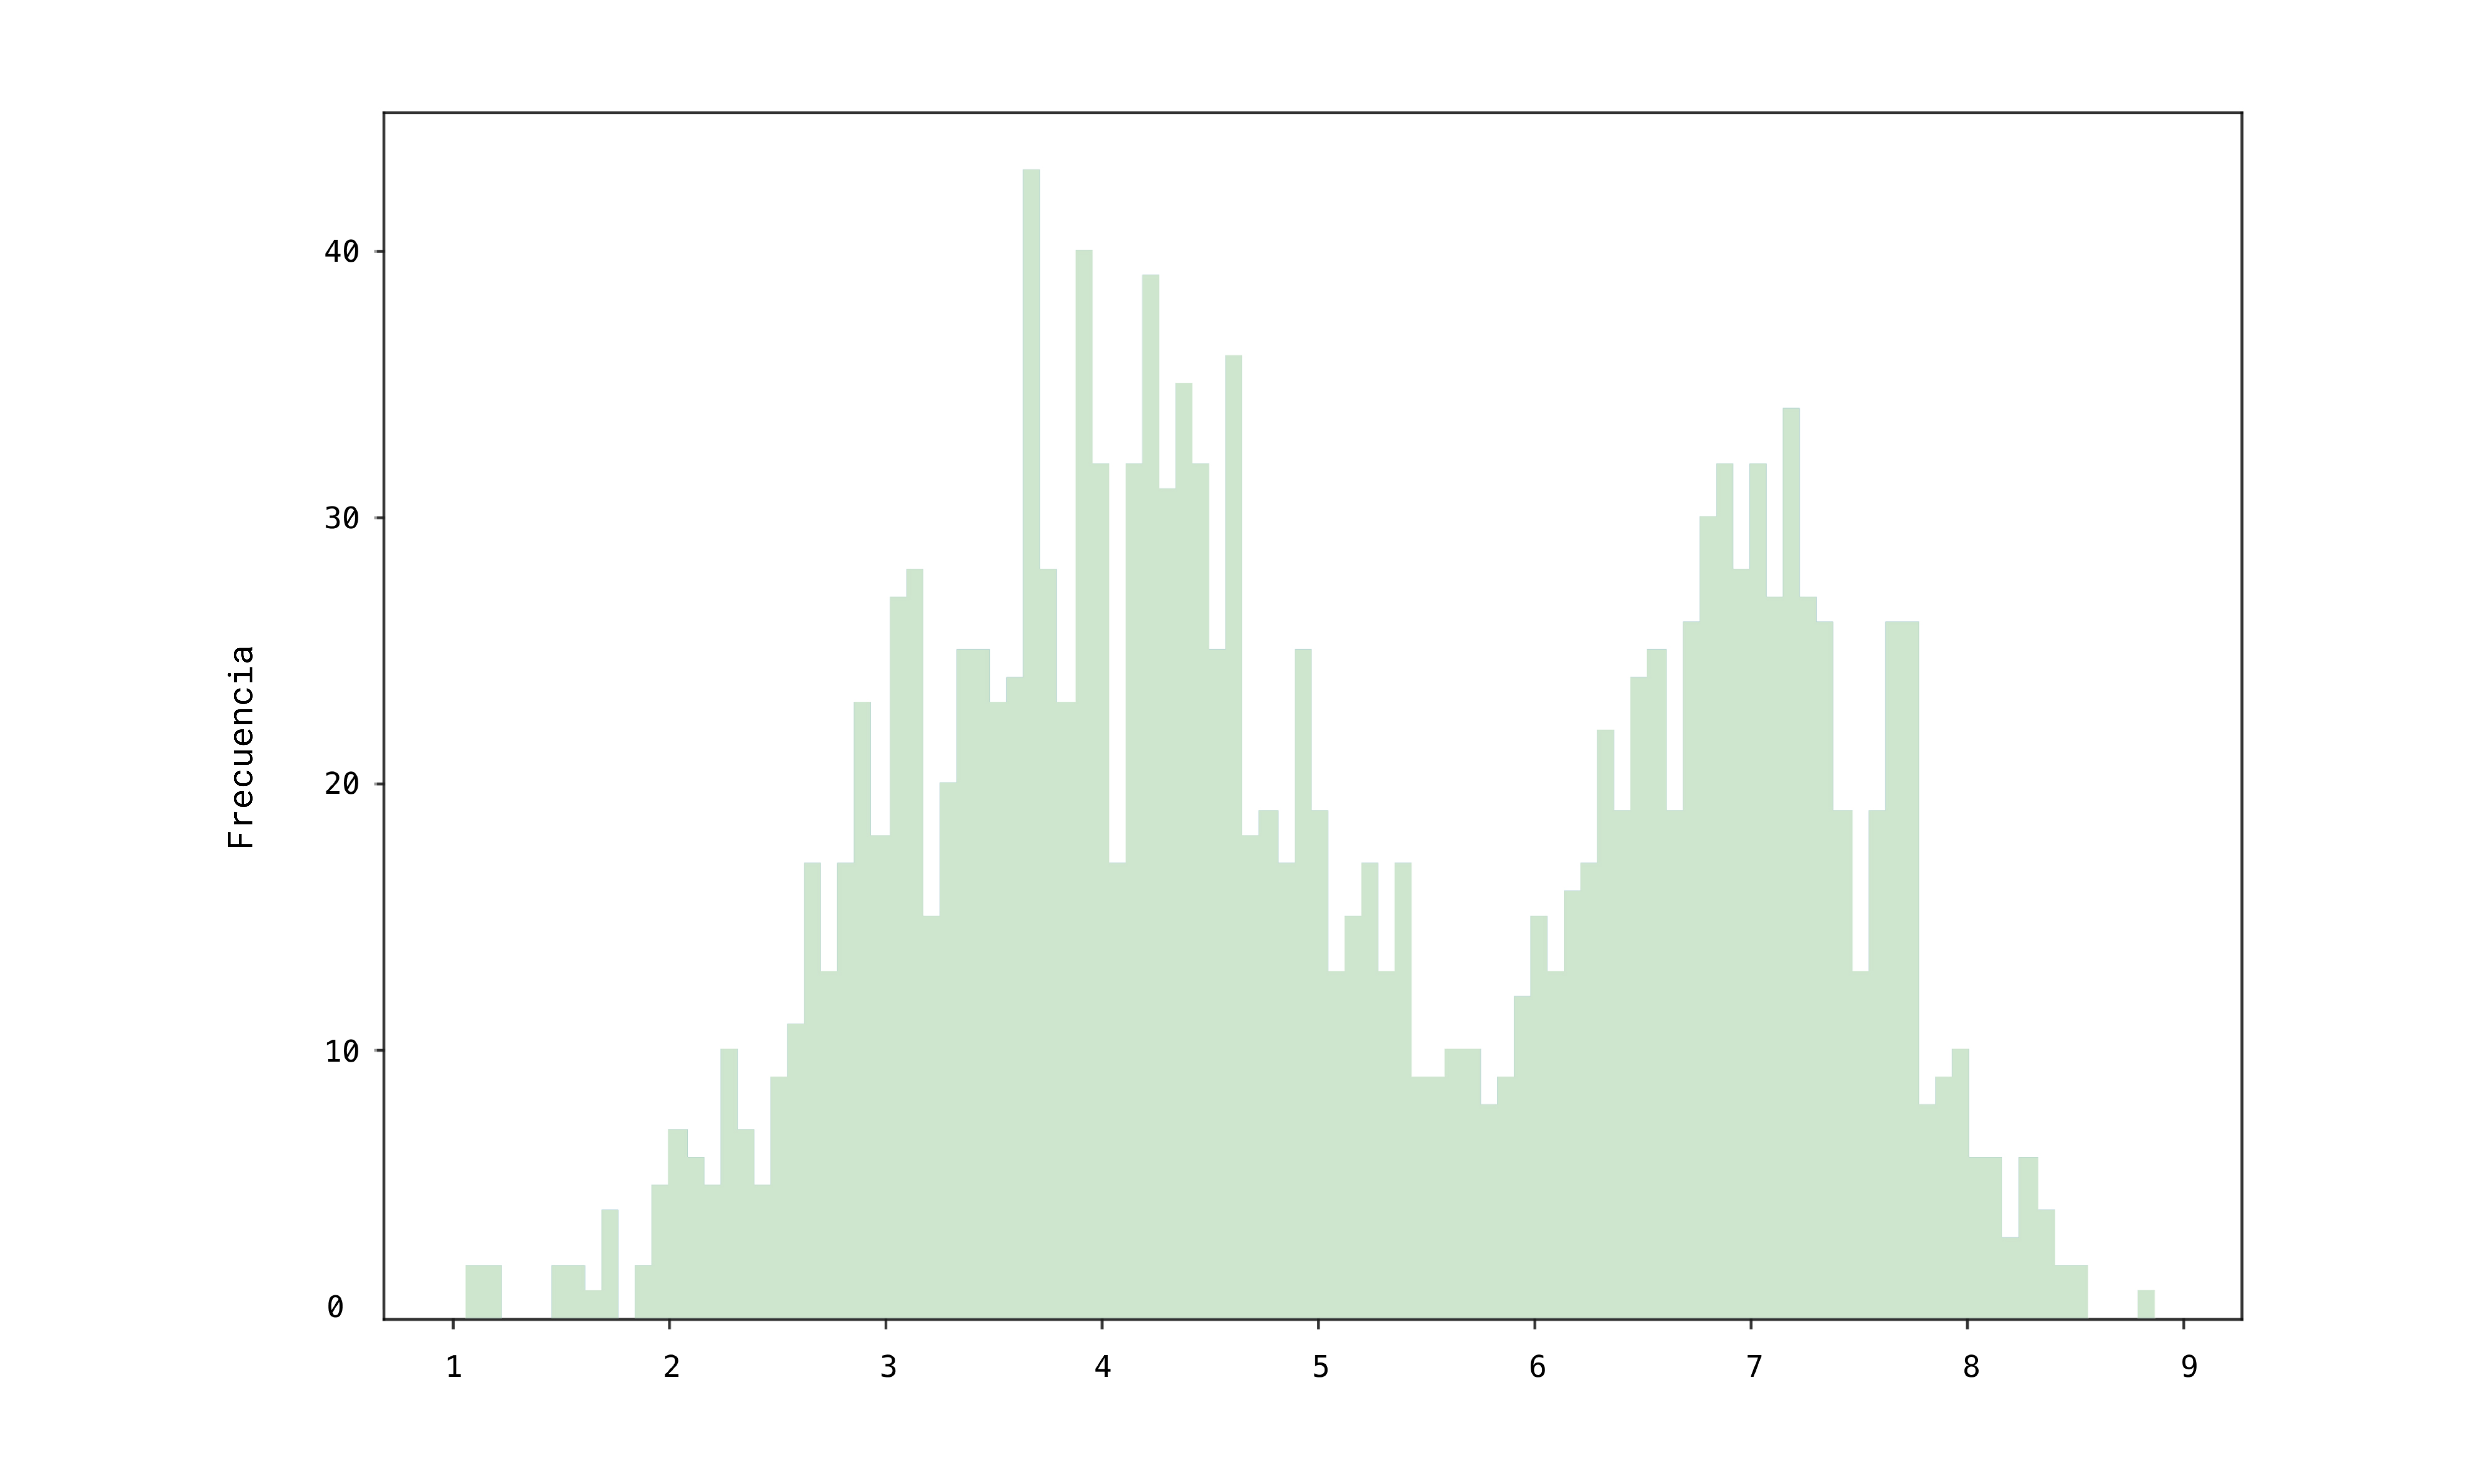

El gráfico con 10 contenedores no tiene suficientes detalles, y el de 100 contenedores tiene demasiados. Elegir el número correcto de contenedores puede ser más un arte que una ciencia, pero con la práctica lograrás dominarlo.

Trazar histogramas de DataFrames

En pandas, hay dos formas de trazar histogramas:

El método hist().
El método plot() con el argumento kind='hist'.
Examinemos hist() primero:

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')
df.hist()

plt.show()

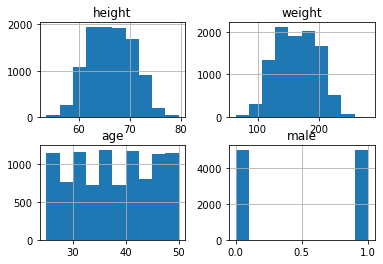

Si se llama a hist() en un DataFrame sin ningún argumento, crea un gráfico separado para cada columna numérica. ¿Estos histogramas te parecen familiares? ¡Eran los gráficos en la diagonal de nuestras matrices de dispersión!

Ahora intentemos llamar a plot() en nuestro DataFrame para hacer histogramas:

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df.plot(kind='hist')

plt.show()

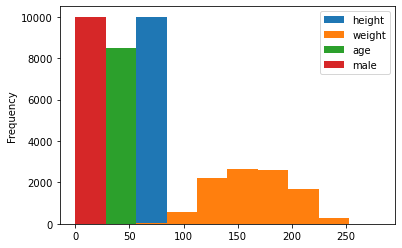

El comportamiento predeterminado de plot() difiere considerablemente del de hist(). 

Usando plot() podemos trazar cada histograma en el mismo gráfico. Sin embargo, esto no tiene sentido para estos datos, ya que cada una de las cuatro columnas representa una cantidad física distinta. Por tanto, no es adecuado trazarlas todas a lo largo del mismo eje.

Trazado de histogramas de columnas

A menudo, querrás explorar una variable a la vez. Podemos trazar un histograma para una sola columna usando hist() pasando el nombre de la columna como un argumento para el parámetro column=. Echemos un vistazo más de cerca a la columna 'height' (altura):

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df.hist(column='height')

plt.show()

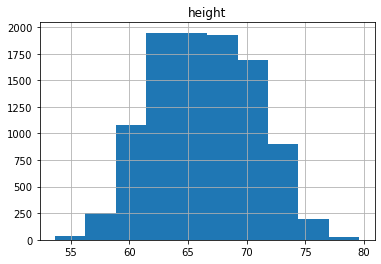

De manera alternativa, podríamos trazar el mismo histograma llamando hist() sólo en la columna 'height':

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df['height'].hist()

plt.show()

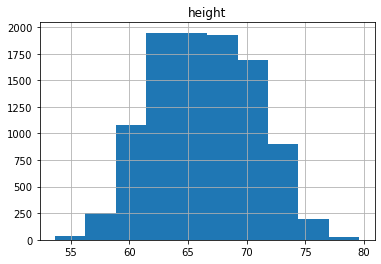

Por defecto, hist() utiliza 10 contenedores. Sin embargo, para estos datos, 10 contenedores parecen demasiado bajos para captar el nivel de detalle que deseamos. Para resolverlo, podemos usar el parámetro bins= para ajustar el número de contenedores usados:

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df.hist(column='height', bins=30)

plt.show()

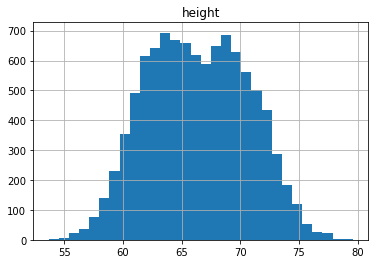

¡Mucho mejor!

Podemos hacer el mismo histograma usando plot() llamándolo sólo en la columna 'height':

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df['height'].plot(kind='hist', bins=30)

plt.show()

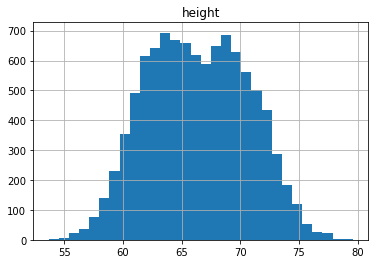

El histograma es el mismo, pero el formato predeterminado de las gráficas difiere entre métodos. Si deseas ver un histograma para una sola variable, te recomendamos usar plot() porque hist() no es compatible con todas las palabras clave de formato que has aprendido, como title=, xlabel=, ylabel=.

Comparación de histogramas para subconjuntos de datos
La altura del histograma trazado arriba muestra dos picos de valores más frecuentes. Esto podría deberse a las diferencias en la distribución de la estatura de hombres y mujeres. Para investigar esta cuestión, podemos trazar los histogramas de altura para hombres y mujeres por separado en la misma gráfica.

Todo lo que tenemos que hacer es filtrar el DataFrame por sexo, y luego llamar a plot() en la columna 'height'. Si hacemos esto dos veces (una para cada sexo), pandas automáticamente trazará ambos en el mismo gráfico, con el segundo histograma delante del primero:

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

# esto mostrará el gráfico de hombres
df[df['male'] == 1]['height'].plot(kind='hist', bins=30)

# esto mostrará el gráfico de mujeres
# e incluye un valor alpha para que podamos ver ambos histogramas por completo
df[df['male'] == 0]['height'].plot(kind='hist', bins=30, alpha=0.8)

plt.legend(['Male', 'Female']) # leyenda, que sigue el mismo orden trazado anteriormente
plt.show()

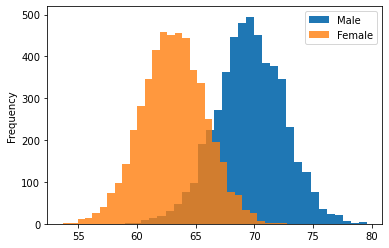

Colocar ambos histogramas en el mismo gráfico hace mucho más fácil ver que la distribución de las alturas para hombres se desplaza hacia la derecha en comparación con la de las mujeres. Por ejemplo, un hombre promedio es probablemente más alto que una mujer promedio. Es por eso que el histograma combinado para el conjunto de datos completo tiene dos picos.

Observa que, en este caso, tiene sentido trazar ambos histogramas en el mismo gráfico, ya que ambos representan la misma variable: height. Sin embargo, en otros casos podría no tener sentido, y debes ser consciente de ello.

Si lo necesitas, puedes usar el índice para dividir tu histograma usando la misma lógica que para el filtro que utilizaste con la variable 'male'. Para ello, ordena la variable y reinicia los índices para que la mujer sea la primera en el DataFrame. Después, corta el DataFrame a la mitad para poder ver la mitad de abajo de los datos.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

#ordena la variable y reinicia los indices para que las mujeres sean las primeras
df = df.sort_values('male').reset_index(drop=True)

#filtra las primeras 5000 filas que corresponde a las mujeres
df = df[df.index < 5000]

#crea histograma de la columna mujeres con 50 contenedores
df.hist(column='height', bins=50)

#muestra el histograma
plt.show()

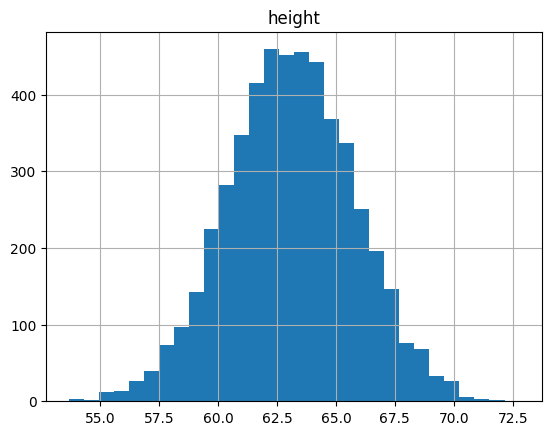

Resumen

Los histogramas nos dan una idea de cómo se distribuyen nuestros datos. Al visualizar la distribución, podemos obtener información clave tales como los valores más frecuentes y la presencia de valores atípicos.

- Podemos usar el método hist() o plot() para hacer histogramas para nuestras cuatro columnas numéricas.
- Llamar a hist() en un DataFrame crea un histograma por separado para cada columna numérica.
- Llamar a plot() con kind='hist' traza un histograma para cada columna numérica , todas en el mismo gráfico.
- Llamar a cualquier método varias veces trazará también cada nuevo histograma en el mismo gráfico. Esto es útil para comparar distribuciones entre diferentes subconjuntos de datos, como la altura de hombres y mujeres.

Ahora es tu turno de practicar cómo hacer histogramas.

Ejercicios

1.

Investiga la distribución del peso para diferentes grupos de edad. Haremos esto en dos pasos. Para comenzar, divide el conjunto de datos en tres DataFrames filtrando df y asígnalos a las siguientes variables:

1. df_20s: solo las filas donde 'age' es menor a 30.
2. df_30s: solo las filas donde 'age' es mayor o igual a 30 y menor a 40.
3. df_40s: solo las filas donde 'age' es mayor o igual a 40 (incluye 50 años).

Para verificar que filtraste correctamente, muestra los siguientes resultados:

1. La suma de las longitudes de los tres DataFrames (debe haber 10 000 filas en total).
2. El valor mínimo y máximo en la columna 'age' de df_20s
3. El valor mínimo y máximo en la columna 'age' de df_30s
4. El valor mínimo y máximo en la columna 'age' de df_40s

El precódigo ya contiene una plantilla para que muestres tus resultados, solo completa el código.

Filtra df en las siguientes condiciones: 'age' < 30, 'age' ≥ 30 y < 40, y 'age' ≥ 40. Asigna cada DataFrame filtrado a la variable adecuada. Para mostrar la suma de las longitudes, usa la función len() con cada DataFrame y súmalos. Para mostrar los valores mínimo y máximo, llama a los métodos min() y max() en la columna 'age' de cada DataFrame respectivo.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

# separa df en dataframes separados según la edad
df_20s = df[df['age'] < 30]
df_30s = df[(df['age'] >= 30) & (df['age'] < 40)]
df_40s = df[df['age'] >= 40]

# print out the results
print("La suma de las longitudes del dataframe:", len(df_20s) + len(df_30s) + len(df_40s))
print("Edad mínima y máxima para df_20s:", df_20s['age'].min(), df_20s['age'].max())
print("Edad mínima y máxima para df_30s:", df_30s['age'].min(), df_30s['age'].max())
print("Edad mínima y máxima para df_40s:", df_40s['age'].min(), df_40s['age'].max())      

"""
La suma de las longitudes del dataframe: 10000
Edad mínima y máxima para df_20s: 25 29
Edad mínima y máxima para df_30s: 30 39
Edad mínima y máxima para df_40s: 40 50"""

2.

Y, para el segundo paso, vas a crear un histograma para cada grupo de edad, todos en la misma gráfica. Para esto, haz lo siguiente:

- Llama plot() en la columna 'weight' de df_20s
    - Establece el número de contenedores a 20.
    - Título de la gráfica “Weight / lbs” ("Peso / lbs").
    - Etiqueta el eje Y “Frequency” ("Frecuencia").

- Llama plot() en la columna 'weight' de df_30s
    - Establece el número de contenedores a 20.
    - Establece el valor de alpha a 0.6.
    
- Llama plot() en la columna 'weight' de df_40s
    - Establece el número de contenedores a 20.
    - Establece el valor de alpha a 0.3.

Finalmente, usa la función legend() de matplotlib para etiquetar cada histograma como "20s", "30s" y "40s", respectivamente.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_csv('/datasets/height_weight.csv')

df_20s = df[df['age'] < 30]
df_30s = df[(df['age'] >= 30) & (df['age'] < 40)]
df_40s = df[df['age'] >= 40]

df_20s['weight'].plot(kind='hist', bins=20, title='Weight / lbs', ylabel='Frequency') # escribe tu código aquí
df_30s['weight'].plot(kind='hist', bins=20, alpha=0.6) # escribe tu código aquí
df_40s['weight'].plot(kind='hist', bins=20, alpha=0.3) # escribe tu código aquí

plt.legend(["20s", "30s", "40s"]) # escribe tu código aquí

plt.show()

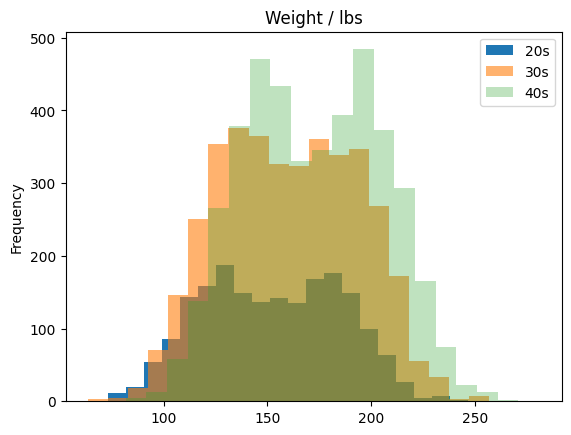

¡Es correcto!

¡Muy bien, eso fue un gran trabajo! Pero valió la pena por la cantidad de información que obtenemos de una sola gráfica.

Por ejemplo, vemos dos picos para cada grupo de edad, vemos que el grupo de 20 años está subrepresentado, y que el peso tiende a aumentar con la edad.

Esta información pueden generar aún más preguntas para explorar. El proceso del análisis de datos suele ser orgánico de esta manera: la información conduce a preguntas que, a su vez, llevan a más información, y así sucesivamente.